In [1]:
%matplotlib inline
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import make_coronagraph
import h5py

import timeit

## Generating Data

In [2]:
def generate_image(coeffs):
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

    wfe_in = [0]
    wfe_in.extend(coeffs)
    
    oversample = 4
    wavelength=632e-9*u.m
    coronagraph='fqpm'
    npix_pupil = 512

    npix_detector = 128
    detector_fov = 0.3 #arcsec
    detector_pixelscale = detector_fov/npix_detector
    sensor_defocus = 4 #(waves)
    obscuration = False
    vortex_charge = None
    
    llowfs = make_coronagraph(wfe_in,wavelength=wavelength,oversample=oversample,pixelscale=detector_pixelscale,\
                            sensor_defocus=sensor_defocus,llowfs=True,npix_pupil=npix_pupil,\
                            npix_detector=npix_detector, mask_type=coronagraph,\
                            vortex_charge=vortex_charge, obscuration=obscuration)
    psf = llowfs.calc_psf(wavelength=wavelength, display_intermediates=False)
    return psf[0].data



## No Aberrations

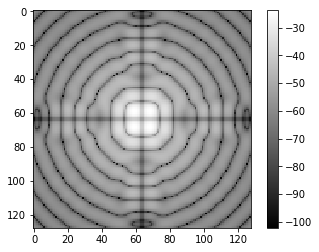

In [3]:
coeffs = [] #Noll indices
coeffs.append(0); #2: Tip
coeffs.append(0); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil

im = generate_image(coeffs)

plt.figure()
plt.imshow(10*np.log10(im),cmap='gray')
plt.colorbar()

## Tip along one FQPM axis

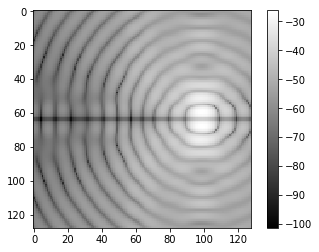

In [4]:
coeffs = [] #Noll indices
coeffs.append(600e-9); #2: Tip
coeffs.append(0); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil

im = generate_image(coeffs)

plt.figure()
plt.imshow(10*np.log10(im),cmap='gray')
plt.colorbar()

## Tip-tilt between FQPM axes

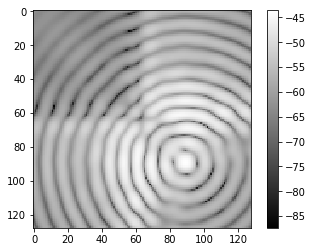

In [5]:
coeffs = [] #Noll indices
coeffs.append(425e-9); #2: Tip
coeffs.append(425e-9); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil

im = generate_image(coeffs)

plt.figure()
plt.imshow(10*np.log10(im),cmap='gray')
plt.colorbar()

## Comparing Spherical and Defocus

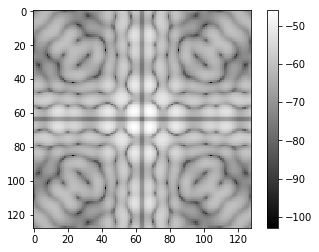

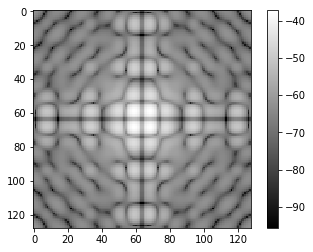

In [6]:
coeffs = [] #Noll indices
coeffs.append(0); #2: Tip
coeffs.append(0); #3: Tilt
coeffs.append(600e-9); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs1 = coeffs.copy();

coeffs = [] #Noll indices
coeffs.append(0); #2: Tip
coeffs.append(0); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(600e-9); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs2 = coeffs.copy();

im1 = generate_image(coeffs1)
im2 = generate_image(coeffs2)

plt.figure()
plt.imshow(10*np.log10(im1),cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(10*np.log10(im2),cmap='gray')
plt.colorbar()

## Comparing Spherical and Defocus in the presence of Tip and Tilt

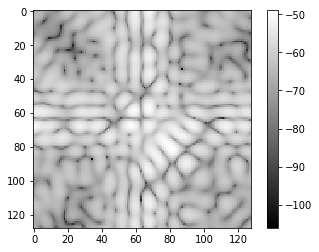

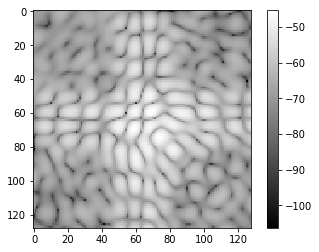

In [7]:
coeffs = [] #Noll indices
coeffs.append(200e-9); #2: Tip
coeffs.append(200e-9); #3: Tilt
coeffs.append(600e-9); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs1 = coeffs.copy();

coeffs = [] #Noll indices
coeffs.append(200e-9); #2: Tip
coeffs.append(200e-9); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(600e-9); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs2 = coeffs.copy();

im1 = generate_image(coeffs1)
im2 = generate_image(coeffs2)

plt.figure()
plt.imshow(10*np.log10(im1),cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(10*np.log10(im2),cmap='gray')
plt.colorbar()

## Only Noll Index 14 (Vertical Quadrafoil)

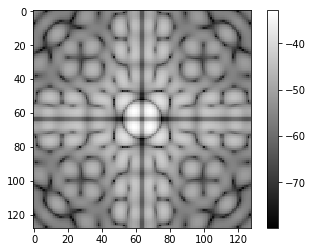

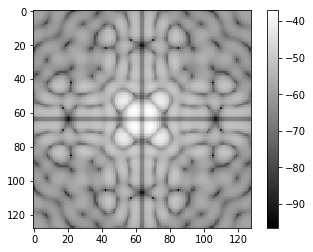

In [8]:
coeffs = [] #Noll indices
coeffs.append(0); #2: Tip
coeffs.append(0); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(200e-9); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs1 = coeffs.copy();

coeffs = [] #Noll indices
coeffs.append(0); #2: Tip
coeffs.append(0); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(600e-9); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs2 = coeffs.copy();

im1 = generate_image(coeffs1)
im2 = generate_image(coeffs2)

plt.figure()
plt.imshow(10*np.log10(im1),cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(10*np.log10(im2),cmap='gray')
plt.colorbar()

## Vertical Quadrafoil with some Tip-tilt

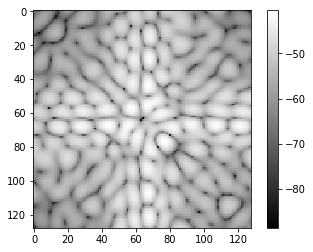

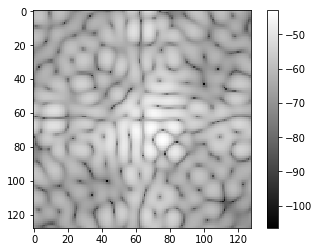

In [9]:
coeffs = [] #Noll indices
coeffs.append(200e-9); #2: Tip
coeffs.append(200e-9); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(200e-9); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs1 = coeffs.copy();

coeffs = [] #Noll indices
coeffs.append(200e-9); #2: Tip
coeffs.append(200e-9); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(0); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(600e-9); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs2 = coeffs.copy();

im1 = generate_image(coeffs1)
im2 = generate_image(coeffs2)

plt.figure()
plt.imshow(10*np.log10(im1),cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(10*np.log10(im2),cmap='gray')
plt.colorbar()

## Only Noll Index 12 (Vertical Secondary Astigmatism)

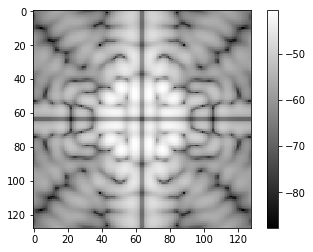

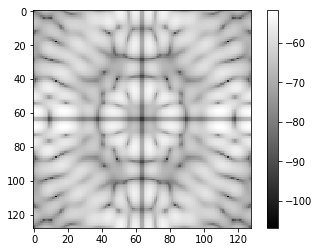

In [10]:
coeffs = [] #Noll indices
coeffs.append(0); #2: Tip
coeffs.append(0); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(200e-9); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs1 = coeffs.copy();

coeffs = [] #Noll indices
coeffs.append(0); #2: Tip
coeffs.append(0); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(600e-9); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs2 = coeffs.copy();

im1 = generate_image(coeffs1)
im2 = generate_image(coeffs2)

plt.figure()
plt.imshow(10*np.log10(im1),cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(10*np.log10(im2),cmap='gray')
plt.colorbar()

## Vertical Secondary Astigmatism with some Tip-Tilt

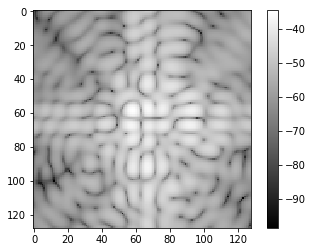

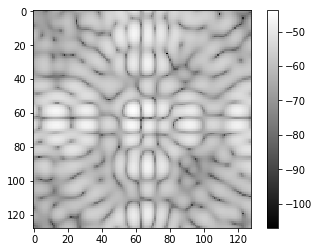

In [11]:
coeffs = [] #Noll indices
coeffs.append(200e-9); #2: Tip
coeffs.append(200e-9); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(200e-9); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs1 = coeffs.copy();

coeffs = [] #Noll indices
coeffs.append(200e-9); #2: Tip
coeffs.append(200e-9); #3: Tilt
coeffs.append(0); #4: Defocus
coeffs.append(0); #5: Oblique Astigmatism
coeffs.append(0); #6: Vertical Astigmatism
coeffs.append(0); #7: Vertical Coma
coeffs.append(0); #8: Horizontal Coma
coeffs.append(0); #9: Vertical Trefoil
coeffs.append(0); #10: Oblique Trefoil
coeffs.append(0); #11: Primary Spherical
coeffs.append(600e-9); #12: Vertical Secondary Astigmatism
coeffs.append(0); #13: Oblique Secondary Astigmatism
coeffs.append(0); #14: Vertical Quadrafoil
coeffs.append(0); #15: Oblique Quadrafoil
coeffs2 = coeffs.copy();

im1 = generate_image(coeffs1)
im2 = generate_image(coeffs2)

plt.figure()
plt.imshow(10*np.log10(im1),cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(10*np.log10(im2),cmap='gray')
plt.colorbar()